In [1]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

import abm_py as abm
import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
import scipy

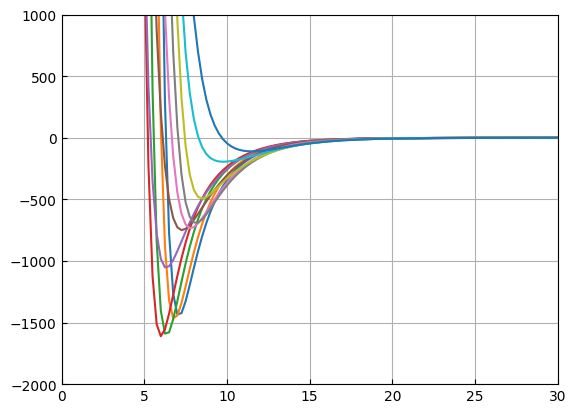

In [3]:
from scipy.special import lpmv

data = utility.load(f"{DATA_PATH}/potential_AlF_Rb_data.dat")
distances = data[:, 0]
values = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values)

ax.set_xlim(0, 30)
ax.set_ylim(-2000, 1000);

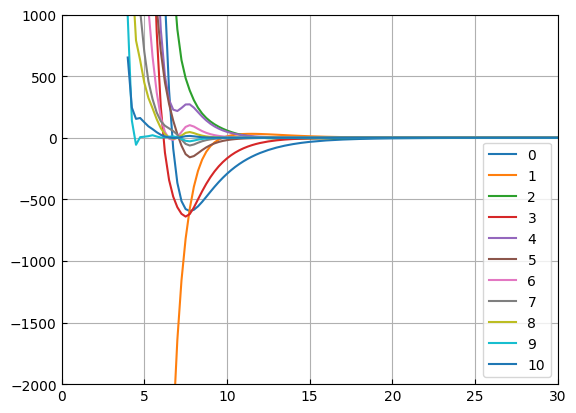

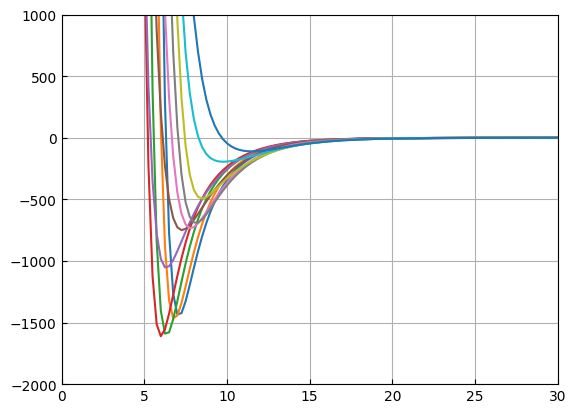

In [4]:
data = utility.load(f"{DATA_PATH}/potential_dec_AlF_Rb.dat")
distances = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values_legendre / CMINV)
ax.legend([str(i) for i in range(11)])

ax.set_xlim(0, 30)
ax.set_ylim(-2000, 1000)

xs, weights = np.polynomial.legendre.leggauss(11)
xs = xs[::-1]

values_reconstructed = np.zeros_like(values)
for angle_index, x in enumerate(xs):
    legendre = np.array([lpmv(0, lambd, x) for lambd in range(11)])
    
    for i in range(len(distances)):
        value = np.sum(values_legendre[i, :] * legendre)
        values_reconstructed[i, angle_index] = value

        
fig, ax = utility.plot()
ax.plot(distances, values_reconstructed / CMINV)
ax.set_xlim(0, 30)
ax.set_ylim(-2000, 1000);

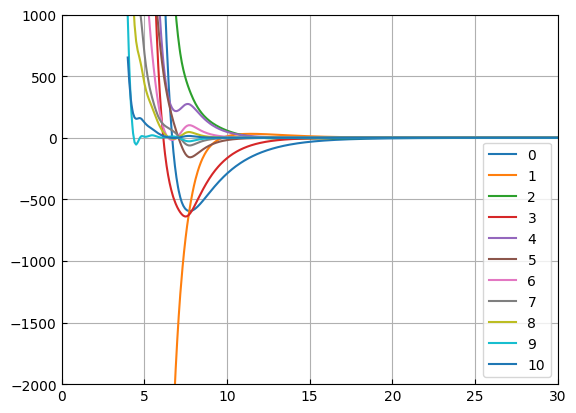

In [5]:
data = utility.load(f"{DATA_PATH}/interpolated_dec_AlF_Rb.dat")
distances = data[:, 0]
values = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values)

ax.legend([str(i) for i in range(11)])
ax.set_xlim(0, 30)
ax.set_ylim(-2000, 1000);

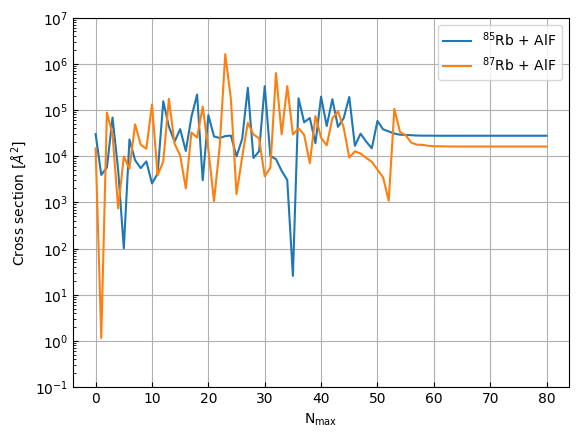

In [6]:
fig, ax = utility.plot()
ax.set_xlabel(r"N$_\text{max}$")
ax.set_ylabel(r"Cross section [$\AA^2$]")
ax.set_yscale("log")
ax.set_ylim(0.1, 1e7)

data = utility.load(f"{DATA_PATH}/AlF_Rb_elastic_section_false.dat")
ax.plot(data[:, 0], data[:, 1], label="$^{85}$Rb + AlF")

data = utility.load(f"{DATA_PATH}/AlF_Rb_elastic_section_true.dat")
ax.plot(data[:, 0], data[:, 1], label="$^{87}$Rb + AlF")

ax.legend();
fig.savefig(f"{SAVE_PATH}/spinless_AlF_Rb_n_max_dependence.pdf")

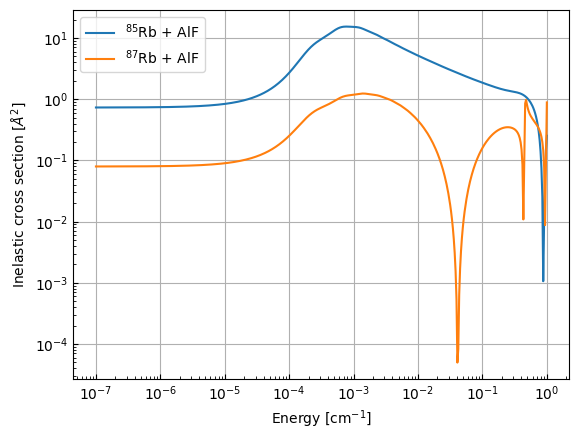

In [ ]:
fig, ax = utility.plot()
ax.set_xlabel(r"Energy [cm$^{-1}$]")
ax.set_ylabel(r"Inelastic cross section [$\AA^2$]")
ax.set_xscale("log")
ax.set_yscale("log")

data = utility.load(f"{DATA_PATH}/AlF_Rb_inelastic_section_false.dat")
ax.plot(data[:, 0], data[:, 1], label="$^{85}$Rb + AlF")

data = utility.load(f"{DATA_PATH}/AlF_Rb_inelastic_section_true.dat")
ax.plot(data[:, 0], data[:, 1], label="$^{87}$Rb + AlF")

ax.legend();

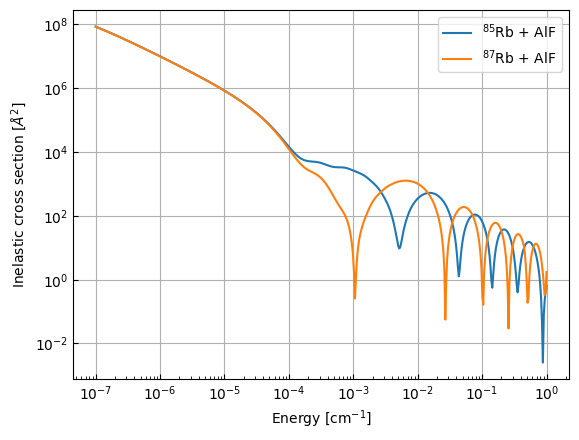

In [18]:
fig, ax = utility.plot()
ax.set_xlabel(r"Energy [cm$^{-1}$]")
ax.set_ylabel(r"Inelastic cross section [$\AA^2$]")
ax.set_xscale("log")
ax.set_yscale("log")

data = utility.load(f"{DATA_PATH}/AlF_Rb_inelastic_section_false.dat")
ax.plot(data[:, 0], data[:, 4], label="$^{85}$Rb + AlF")

data = utility.load(f"{DATA_PATH}/AlF_Rb_inelastic_section_true.dat")
ax.plot(data[:, 0], data[:, 4], label="$^{87}$Rb + AlF")

ax.legend();